<a href="https://colab.research.google.com/github/CorentinMAG/AI/blob/master/keras_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

#les tableaux train_** sont les données qui vont être donnée à l'algorithme afin d'apprendre
#les tableaux test_*** serviront à tester l'algorithme
#les images sont des tableaux 28x28 avec es valeurs allant de 0 à 255 (pixels)
#les labels sont des entiers allant de 0 à 9 (0 = t-shirt, 1 = pantalon, ...)
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

#les labels
class_names = ['T-shirt/haut', 'Pantalon', 'Pullover', 'Robe', 'Manteau',
               'Sandale', 'Chemise', 'Chaussure', 'Sac', 'Bottine']

#il y a 60 000 images, des matrices de 28 lignes et 28 colonnes
print(train_images.shape)

#60 000 labels dans l'ensemble d'entrainement
print(len(train_labels))

#10 000 images dans l'ensemble de test avec 10 000 labels
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


# Prétraiter les données

Les données doivent être prétraitées avant d'entraîner le réseau

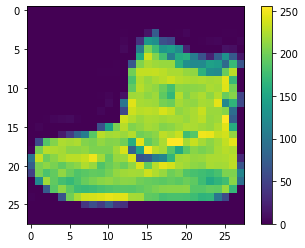

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

afin de simplifier les choses, au lieu d'avoir des valeurs de 0 à 255 on va changer d'échelle pour avoir des valeurs comprises entre 0 et 1

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

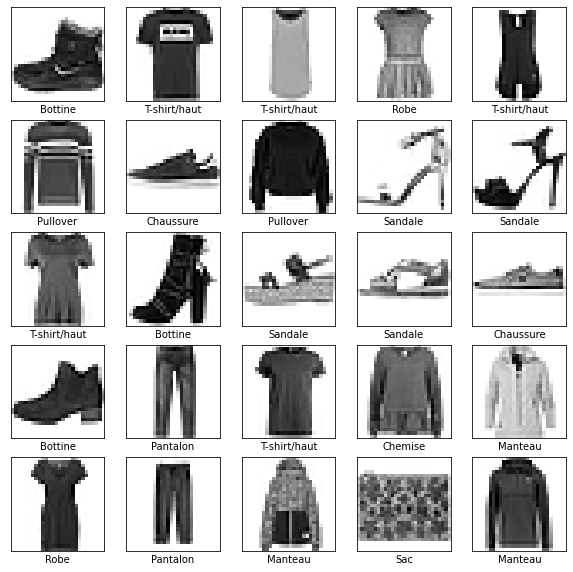

In [17]:
#on affiche les 25 premières images du set d'entrainement
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construction du modèle (Réseau de neurones)

La construction du réseau neuronal nécessite la configuration des couches du modèle, puis la compilation du modèle.

Les couches extraient des représentations des données qui y sont introduites. Il faut que ces données soient pertinentes.

Le deep learning consiste à enchainer des couches simples.

In [20]:
model = keras.Sequential([
    # cette couche transforme le format des images (28x28) en un tableau unidimensionnel de 784 pixels
    keras.layers.Flatten(input_shape=(28, 28)), 
    #la deuxième couche possède 128 neurones
    keras.layers.Dense(128, activation='relu'),

    #la dernière couche possède 10 neurones
    #chaque neurone contient un score qui indique que l'image actuelle appartient à l'une des 10 classes
    keras.layers.Dense(10)
])

# compilation du modèle

Avant que le modèle ne soit prêt pour l'entraînement, il a besoin de quelques paramètres supplémentaires. Ceux-ci sont ajoutés lors de l'étape de compilation du modèle:
* **fonction de perte** : mesure la précision du modèle pendant l'entraînement. Il faut minimiser cette fonction pour "diriger" le modèle dans la bonne direction.
* **optimiseur** : c'est ainsi que le modèle est mis à jour en fonction des données qu'il voit et de sa fonction de perte.
* **métriques** : utilisées pour surveiller les étapes de formation et de test

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Former le modèle

La formation du modèle de réseau neuronal nécessite les étapes suivantes:

* Envoyez les données d'entraînement au modèle (train_images et train_labels).
* Le modèle apprend à associer des images et des étiquettes.
* On demande au modèle de faire des prédictions sur un jeu de test (test_images).
* On vérifie que les prédictions correspondent aux étiquettes du tableau test_labels.

In [22]:
#on "nourrit" le model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4988 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3724 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3350 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3104 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2946 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2788 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2548 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2483 - accuracy: 0.9059
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

## précision du model

In [26]:
#maintenant que le modèle est entrainé, on lui fournit les données de test 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3312 - accuracy: 0.8822

Test accuracy: 0.8822000026702881


Il s'avère que la précision sur l'ensemble de données de test est un peu inférieure à la précision sur l'ensemble de données d'entraînement. Cet écart entre la précision de la formation et la précision des tests représente un surajustement . Le surajustement se produit lorsqu'un modèle d'apprentissage automatique fonctionne moins bien sur de nouvelles entrées auparavant invisibles que sur les données d'entraînement. Un modèle sur-ajusté «mémorise» le bruit et les détails dans l'ensemble de données d'apprentissage à un point où il a un impact négatif sur les performances du modèle sur les nouvelles données.

**Pour éviter le surajustement**, la meilleure solution consiste à utiliser des données d'entraînement plus complètes. L'ensemble de données doit couvrir la gamme complète des entrées que le modèle est censé gérer. Des données supplémentaires ne peuvent être utiles que si elles couvrent des cas nouveaux et intéressants.

Pour mieux apprendre on peut : 
* réduire progressivement le taux d'apprentissage pendant l'entrainement
* les architecture de réseau plus simple sont moins susceptible de sur-adapter que les complexes. Un modèle simple est un modèle où la distribution des valeurs de paramètres a moins d'entropie (ou un modèle avec moins de paramètres). **Ainsi, une manière courante d'atténuer le surajustement est de mettre des contraintes sur la complexité d'un réseau**, c'est ce qu'on appelle la **régularisation des poids**
* ajouter un abandon. Consiste à «abandonner» de manière aléatoire un certain nombre de caractéristiques de sortie de la couche pendant l'apprentissage. Le «taux d'abandon» est la fraction des caractéristiques qui sont supprimées; il est généralement réglé entre 0,2 et 0,5

# Faire des prédictions
Avec le modèle entraîné, vous pouvez l'utiliser pour faire des prédictions sur certaines images.

In [28]:
#on rajoute une couche softmax qui permet de convertir les logits en probabilités, plus facilement interprétable
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [34]:
predictions = probability_model.predict(test_images)
print(predictions[0])

#affiche le label ou la prédiction est le plus élevé
#ainsi la première image de l'ensemble de test est une bottine
print(np.argmax(predictions[0]))

[6.60924252e-06 1.04881805e-10 5.25969002e-09 3.40639267e-10
 2.96250291e-09 1.60838047e-03 2.54126826e-06 1.71474628e-02
 1.87566229e-08 9.81234968e-01]
9


In [40]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


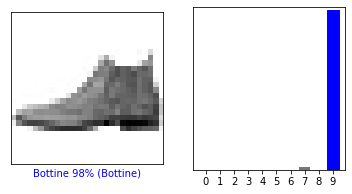

In [41]:
#pour la 1ere image de l'ensemble de test
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

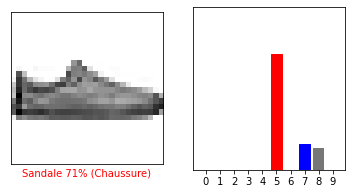

In [43]:
#pour la 12ième image de l'ensemble de test
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

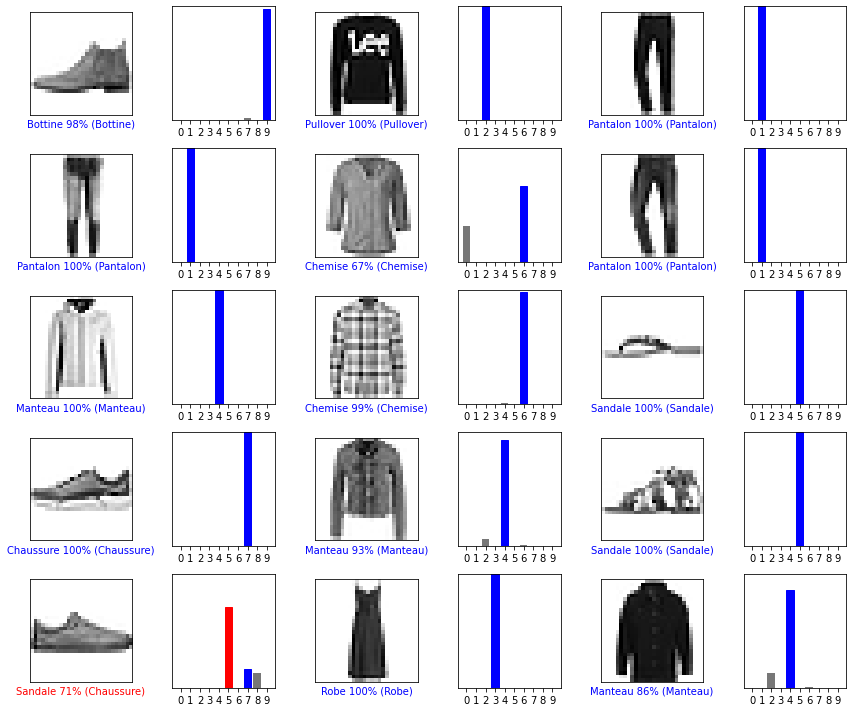

In [44]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Utiliser le modèle 

2

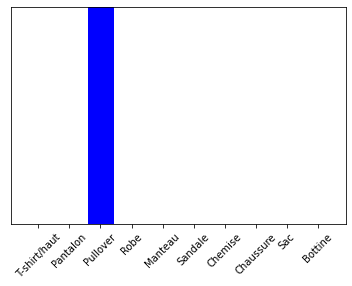

In [47]:
img = test_images[1]

#même si on a une unique image, on doit l'ajouter à une liste
img = (np.expand_dims(img,0))

#ensuite on prédit le label pour cette image
predictions_single = probability_model.predict(img)

#le réseau prédit que c'est un pull over (indice 2)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])